<a href="https://colab.research.google.com/github/madlangbayanjp/Analyzing-Customer-Segments-in-Wholesale-Trade-Using-K-Means-Clustering/blob/main/Madlangbayan_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First I mounted the Google Colab to my Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Then I import all the necessary libraries.
# I may forget to import all the libraries that I needed so I will just import them in the cell that I will use them

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
# I loaded the dataset named wholesale customer data. I found in UCI machine learning repo
# https://archive.ics.uci.edu/dataset/292/wholesale+customers

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wholesale_customer_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# In this, I selected all of the features. I used all the numercal features and exclude the channel and region column
# for clustering because they are categorical

features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[features].values

In [ ]:
# In here, I scaled it to ensure that the features contribute equally to the clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

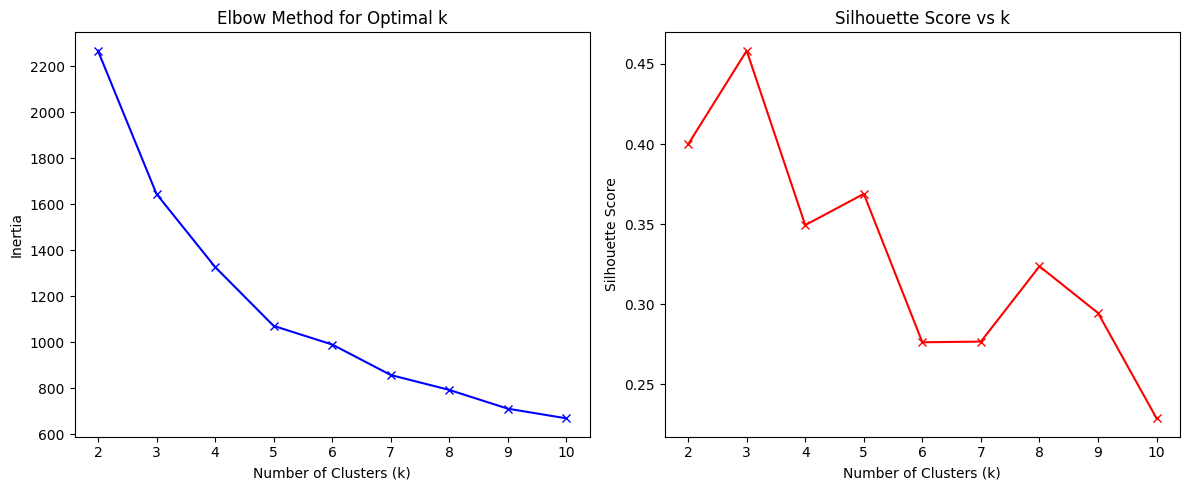

In [ ]:
# So I used the elbow method and the silhoutte scores to make sure the optimal number of clusters
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.tight_layout()
plt.show()

In [ ]:
# Applying the KMeans Clustering
# I used 4 because I based it on the elbow curve and the silhouette scores
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

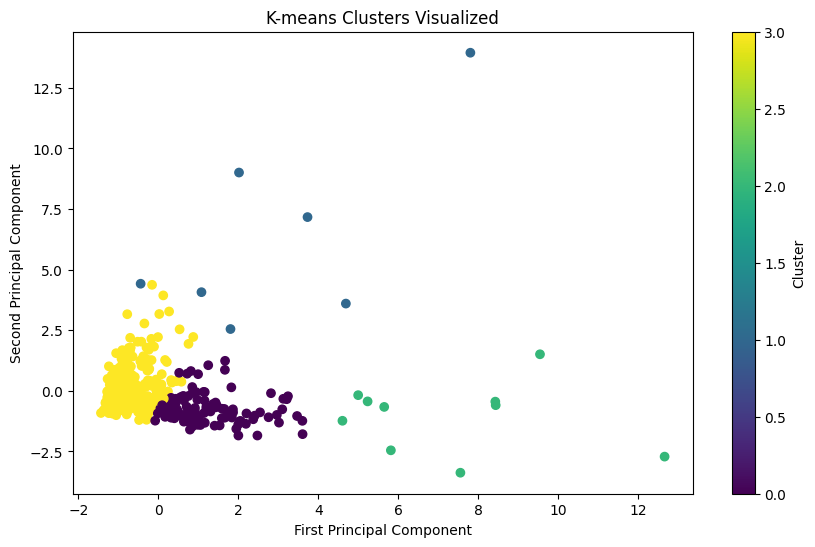

In [ ]:
# I use PCA for visualization because it makes it a 2 components for visualizing clusters in a scatter plot.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot Clusters in PCA Space
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clusters Visualized')
plt.colorbar(scatter, label='Cluster')
plt.show()

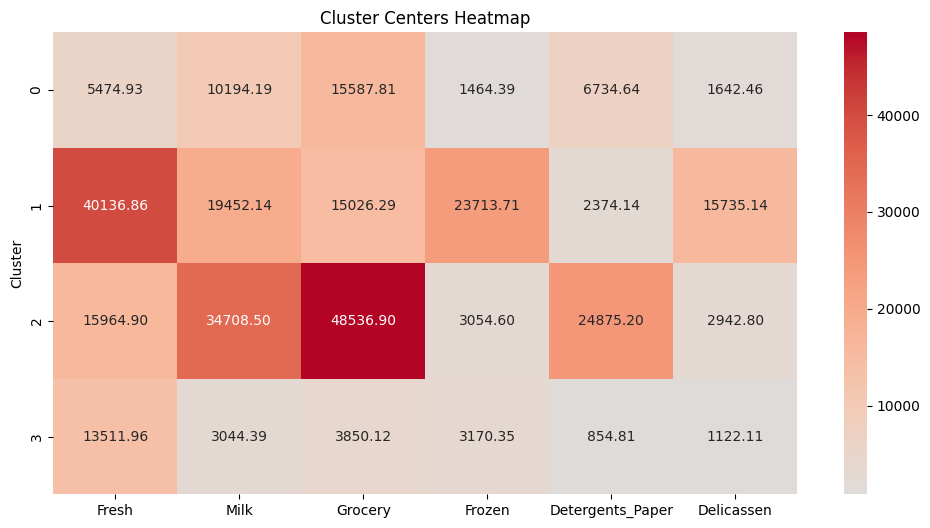


Cluster Sizes:
Cluster
3    314
0    109
2     10
1      7
Name: count, dtype: int64

Cluster Characteristics:
                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0         5474.926606  10194.192661  15587.807339   1464.385321   
1        40136.857143  19452.142857  15026.285714  23713.714286   
2        15964.900000  34708.500000  48536.900000   3054.600000   
3        13511.964968   3044.394904   3850.121019   3170.350318   

         Detergents_Paper    Delicassen  
Cluster                                  
0             6734.642202   1642.458716  
1             2374.142857  15735.142857  
2            24875.200000   2942.800000  
3              854.808917   1122.105096  


In [ ]:
# The heatmap and statistics of cluster centers help interpret the characteristics of each cluster.
df['Cluster'] = clusters
cluster_stats = df.groupby('Cluster')[features].mean()
# Plot Cluster Centers Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_stats, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Cluster Centers Heatmap')
plt.show()

# Print Cluster Sizes and Statistics
print("\nCluster Sizes:")
print(df['Cluster'].value_counts())

print("\nCluster Characteristics:")
print(cluster_stats)